Run this notebook in SageMaker p2.xlarge notebook instance with environment conda_pytorch_p36

This notebook was developed by Ultralytics LLC, and **is freely available for redistribution under the GPL-3.0 license**. For more information please visit https://github.com/ultralytics/yolov5 and https://www.ultralytics.com.

# Initial Setup

Clone repo, install dependencies, `%cd` into `./yolov5` folder and check GPU.

In [ ]:
!pip install tensorboard torch torchvision --upgrade

In [ ]:
# !git clone https://github.com/ultralytics/yolov5  # clone repo
#!pip install -r yolov5/requirements.txt  # install dependencies

In [1]:
%cd ../yolov5

/home/ec2-user/SageMaker/yolov5-on-sagemaker/yolov5


In [2]:
import torch
import torchvision
from IPython.display import Image, clear_output  # to display images
from utils.google_utils import gdrive_download  # to download models/datasets

clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Setup complete. Using torch 1.6.0 _CudaDeviceProperties(name='Tesla V100-SXM2-16GB', major=7, minor=0, total_memory=16160MB, multi_processor_count=80)


# Inference

Run inference with a pretrained checkpoint on contents of `/inference/images` folder. Models are downloaded automatically from our Google Drive [folder](https://drive.google.com/open?id=1Drs_Aiu7xx6S-ix95f9kNsA6ueKRpN2J) if available.

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.4, device='', img_size=416, iou_thres=0.5, output='inference/output', save_txt=False, source='./inference/images/', update=False, view_img=False, weights=['./weights/yolov5s.pt'])
Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-SXM2-16GB', total_memory=16160MB)

Fusing layers... Model Summary: 140 layers, 7.45958e+06 parameters, 6.61683e+06 gradients
image 1/2 /home/ec2-user/SageMaker/yolov5-on-sagemaker/yolov5/inference/images/bus.jpg: 416x352 3 persons, 1 buss, Done. (0.016s)
image 2/2 /home/ec2-user/SageMaker/yolov5-on-sagemaker/yolov5/inference/images/zidane.jpg: 288x416 3 persons, 1 ties, Done. (0.016s)
Results saved to inference/output
Done. (0.130s)


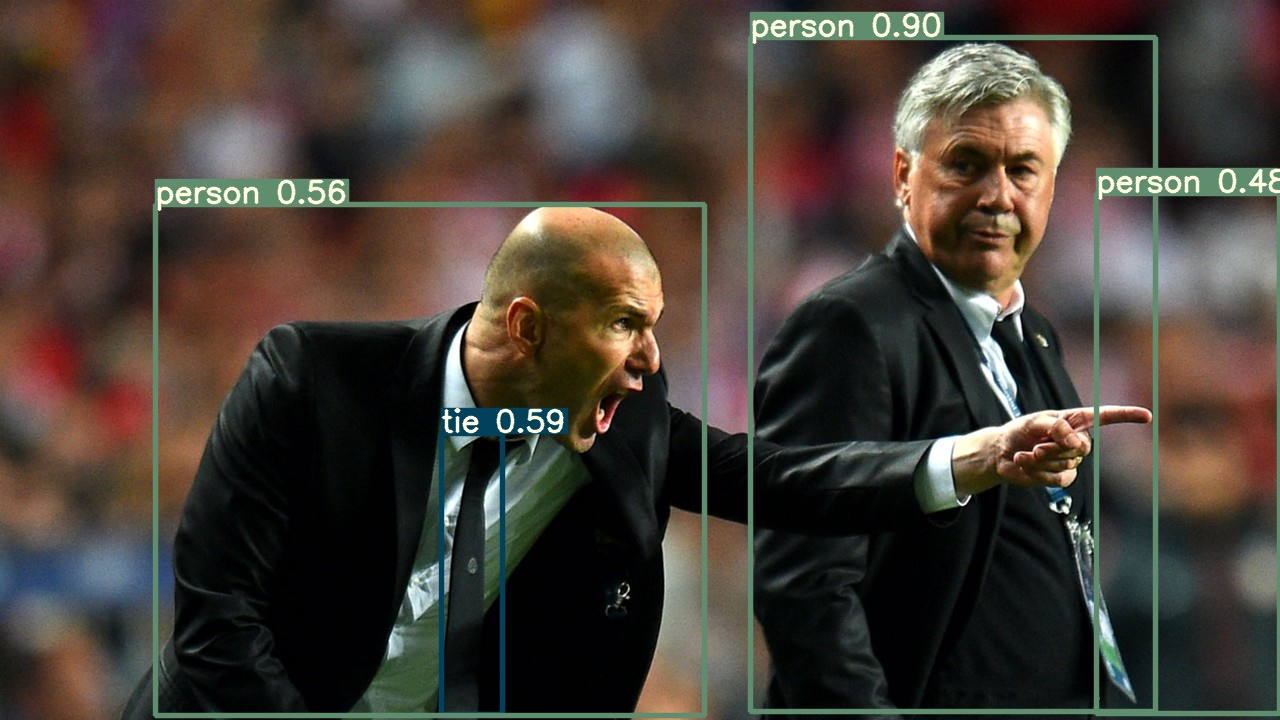

In [3]:
!python detect.py --weights ./weights/yolov5s.pt --img 416 --conf 0.4 --source ./inference/images/
Image(filename='inference/output/zidane.jpg', width=600)

Inference can be run on a variety of sources: images, videos, directories, webcams, rtsp and http streams as shown in the example below.

In [ ]:
# Example syntax (do not run cell)
# !python detect.py --source ./file.jpg  # image 
#                            ./file.mp4  # video
#                            ./dir  # directory
#                            0  # webcam
#                            'rtsp://170.93.143.139/rtplive/470011e600ef003a004ee33696235daa' # rtsp
#                            'http://112.50.243.8/PLTV/88888888/224/3221225900/1.m3u8'  # http

#2. Test
Test a model on COCO val or test-dev dataset to determine trained accuracy. Models are downloaded automatically from our Google Drive [folder](https://drive.google.com/open?id=1Drs_Aiu7xx6S-ix95f9kNsA6ueKRpN2J) if available. To show results by class use the `--verbose` flag. Note that `pycocotools` metrics may be 1-2% better than the equivalent repo metrics, as is visible below, due to slight differences in mAP computation.

## 3. Train

Download the 128-image tutorial training dataset `./data/coco128.yaml`, start tensorboard and train a `yolov5s.yaml` model for **5 epochs**. Note that actual training is typically much longer, around **300-1000 epochs**, depending on your dataset.

In [4]:
# Download tutorial dataset coco128.yaml
gdrive_download('1n_oKgR81BJtqk75b00eAjdv03qVCQn2f','coco128.zip')  # tutorial dataset
!mv ./coco128 ../  # move folder alongside /yolov5

mv: cannot move ‘./coco128’ to ‘../coco128’: Directory not empty


In [ ]:
# # Start tensorboard
# %load_ext tensorboard
# %tensorboard --logdir runs

Train a YOLOv5s model on the coco128 dataset by specifying model configuration file `--cfg ./models/yolo5s.yaml`, and a dataset configuration file `--data ./data/coco128.yaml`. Start training from pretrained `--weights yolov5s.pt`, or from scratch (randomly initialized weights) using `--weights ''`. Pretrained checkpoints are downloaded automatically from our Google Drive [folder](https://drive.google.com/open?id=1Drs_Aiu7xx6S-ix95f9kNsA6ueKRpN2J) if available.


In [8]:
!rm -rf /home/ec2-user/SageMaker/yolov5-on-sagemaker/yolov5/runs

In [9]:
# Train YOLOv5s on coco128 for 5 epochs
!python train.py --img 640 --batch 16 --epochs 5 --data ./data/coco128.yaml --cfg ./models/yolov5s.yaml --weights yolov5s.pt --name tutorial --nosave --cache

Using CUDA device0 _CudaDeviceProperties(name='Tesla V100-SXM2-16GB', total_memory=16160MB)

Namespace(adam=False, batch_size=16, bucket='', cache_images=True, cfg='./models/yolov5s.yaml', data='./data/coco128.yaml', device='', epochs=5, evolve=False, hyp='', img_size=[640, 640], local_rank=-1, multi_scale=False, name='tutorial', noautoanchor=False, nosave=True, notest=False, rect=False, resume=False, single_cls=False, sync_bn=False, total_batch_size=16, weights='yolov5s.pt', world_size=1)
Start Tensorboard with "tensorboard --logdir=runs", view at http://localhost:6006/
Hyperparameters {'lr0': 0.01, 'momentum': 0.937, 'weight_decay': 0.0005, 'giou': 0.05, 'cls': 0.5, 'cls_pw': 1.0, 'obj': 1.0, 'obj_pw': 1.0, 'iou_t': 0.2, 'anchor_t': 4.0, 'fl_gamma': 0.0, 'hsv_h': 0.015, 'hsv_s': 0.7, 'hsv_v': 0.4, 'degrees': 0.0, 'translate': 0.5, 'scale': 0.5, 'shear': 0.0, 'perspective': 0.0, 'flipud': 0.0, 'fliplr': 0.5, 'mixup': 0.0}

                 from  n    params  module                    

## 4. Visualize

After training starts, view `train*.jpg` images to see training images, labels and augmentation effects. Note a mosaic dataloader is used for training (shown below), a new dataloading concept developed by Ultralytics and first featured in [YOLOv4](https://arxiv.org/abs/2004.10934).

In [10]:
!ls ../yolov5/runs

exp0_tutorial


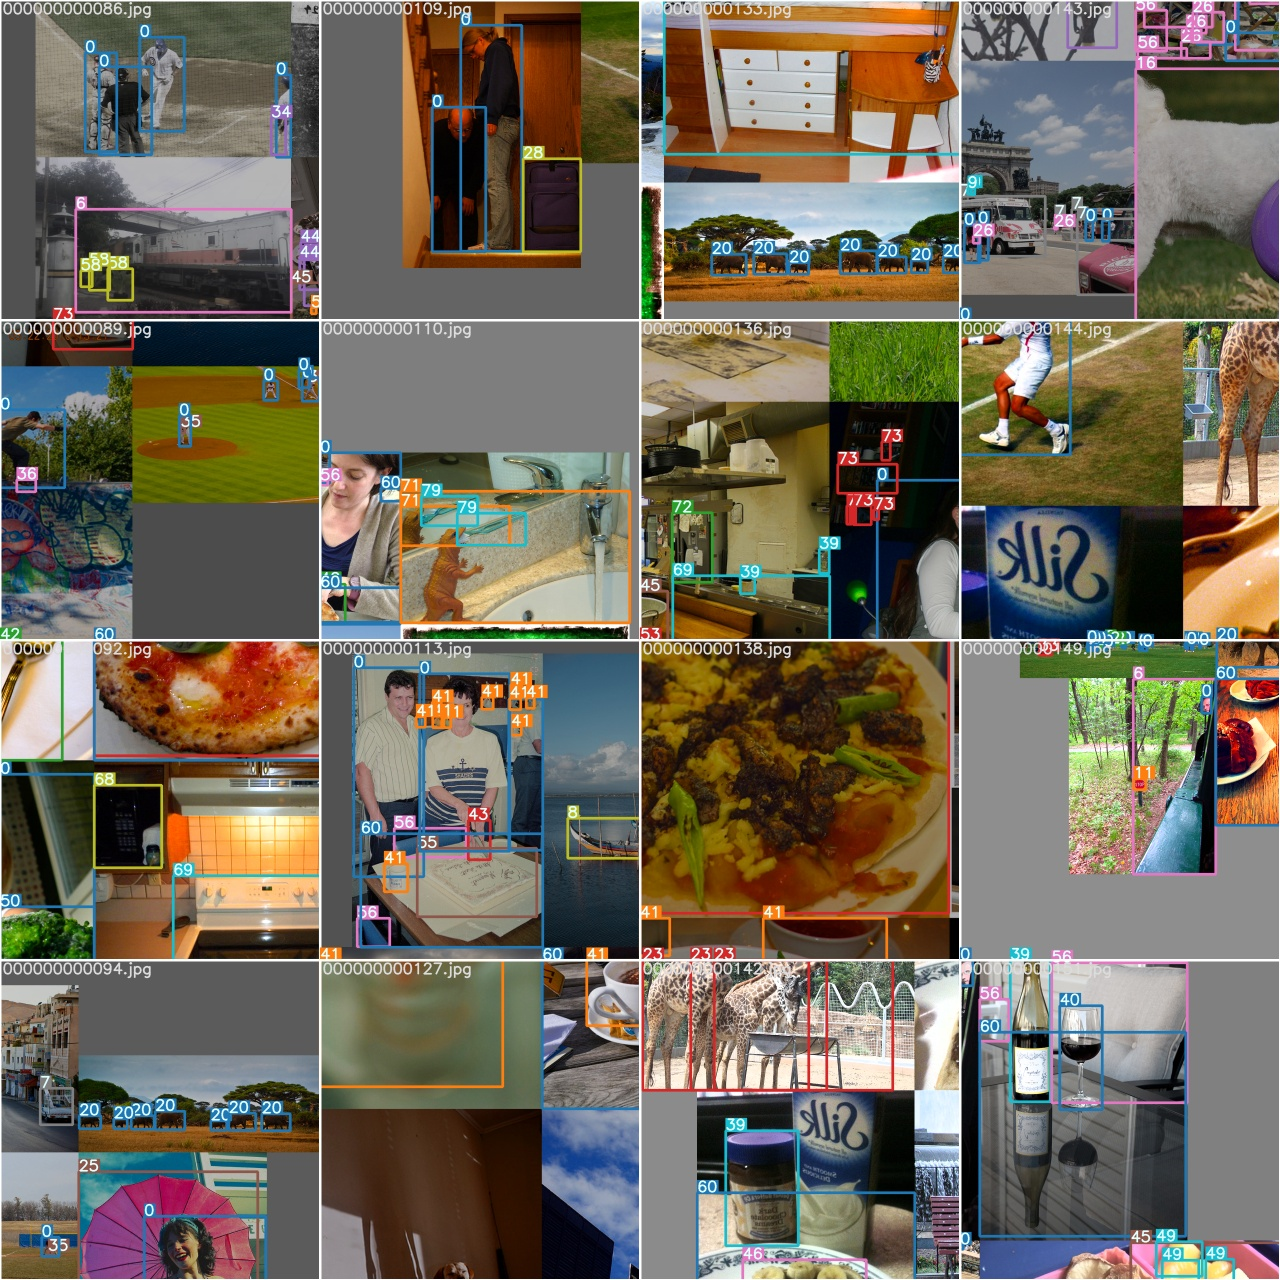

In [11]:
Image(filename='../yolov5/runs/exp0_tutorial/train_batch1.jpg', width=900)  # view augmented training mosaics

View `test_batch0_gt.jpg` to see test batch 0 ground truth labels.

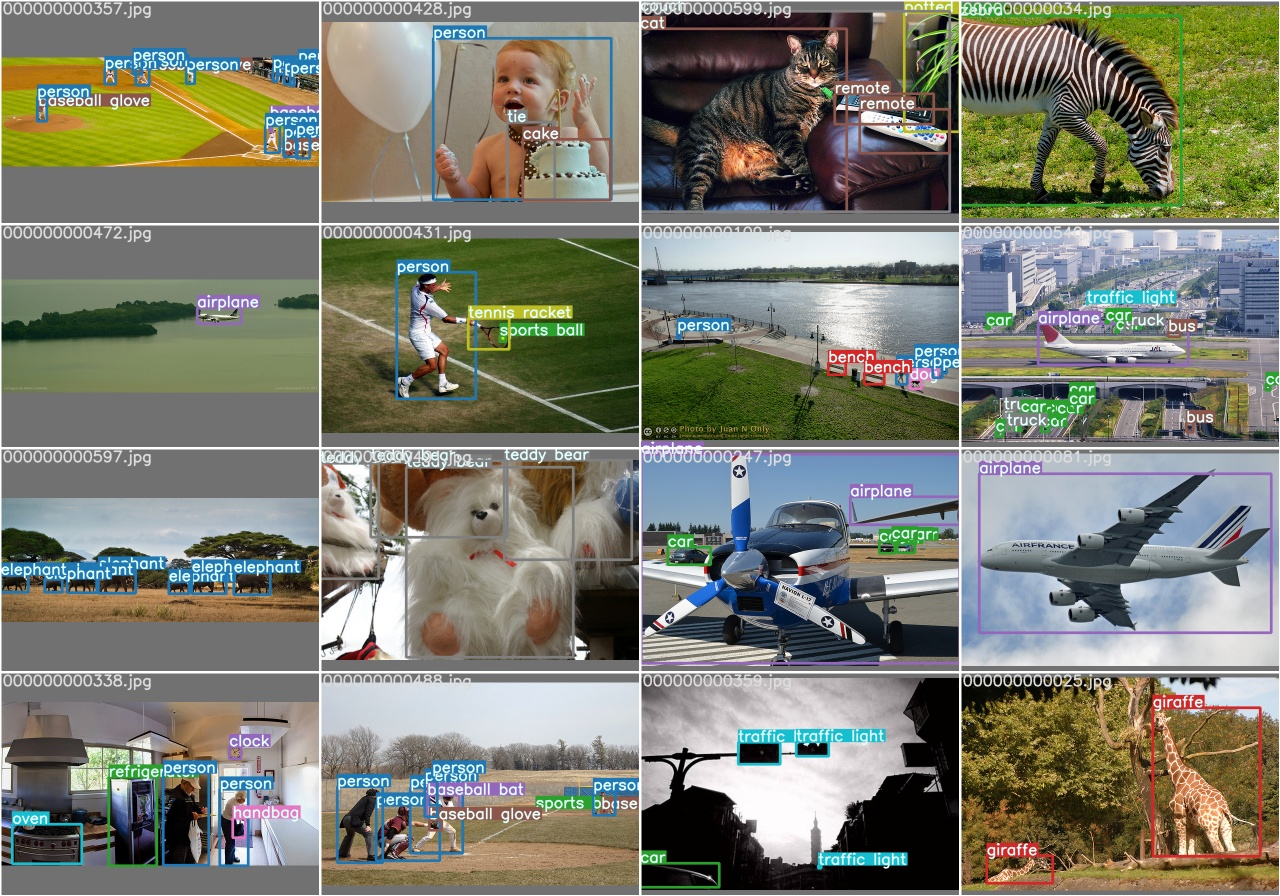

In [12]:
Image(filename='../yolov5/runs/exp0_tutorial/test_batch0_gt.jpg', width=900)  # view test image labels

View `test_batch0_pred.jpg` to see test batch 0 predictions.

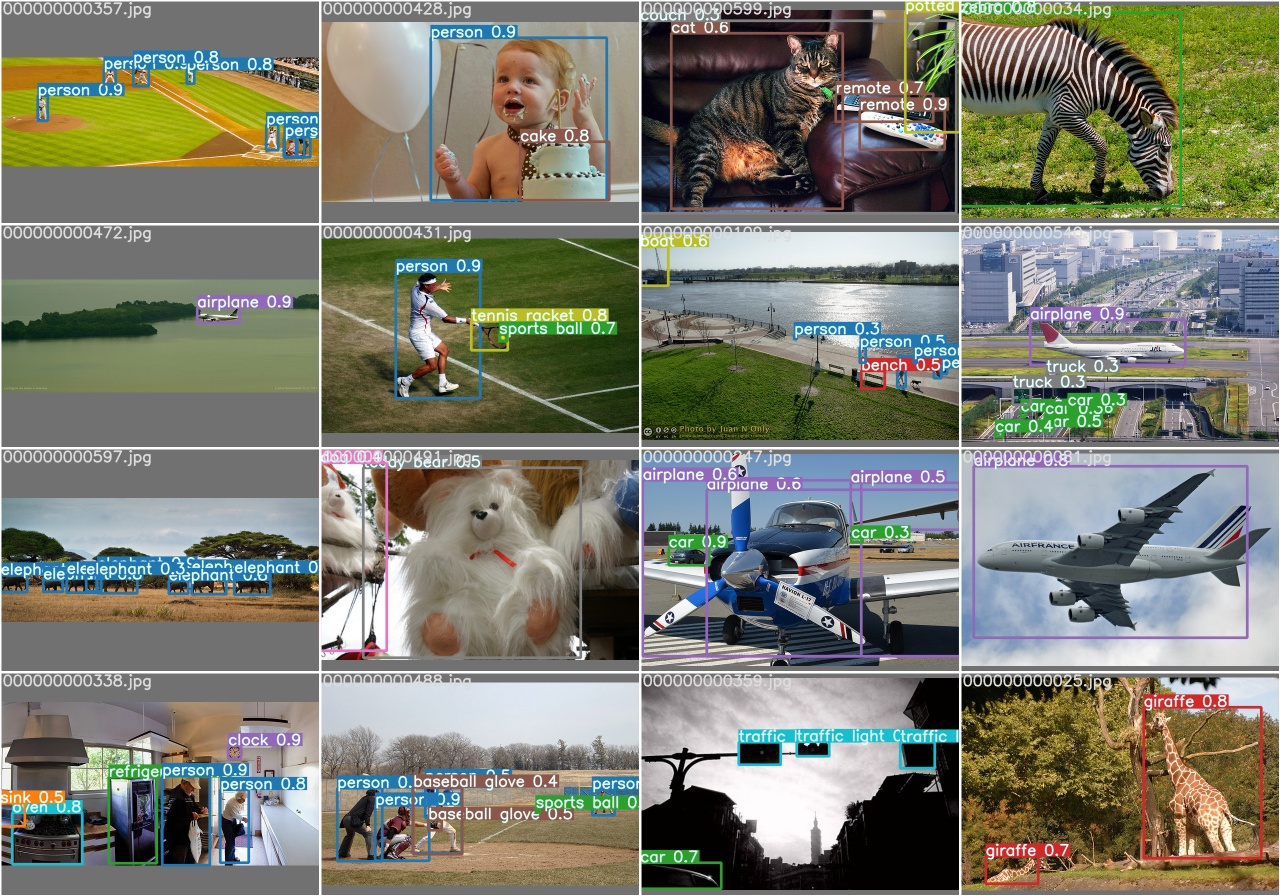

In [13]:
Image(filename='../yolov5/runs/exp0_tutorial/test_batch0_pred.jpg', width=900)  # view test image predictions

Training losses and performance metrics are saved to Tensorboard and also to a `results.txt` logfile. `results.txt` is plotted as `results.png` after training completes. Partially completed `results.txt` files can be plotted with `from utils.utils import plot_results; plot_results()`. Here we show YOLOv5s trained on coco128 to 100 epochs, starting from scratch (orange), and starting from pretrained `yolov5s.pt` weights (blue).

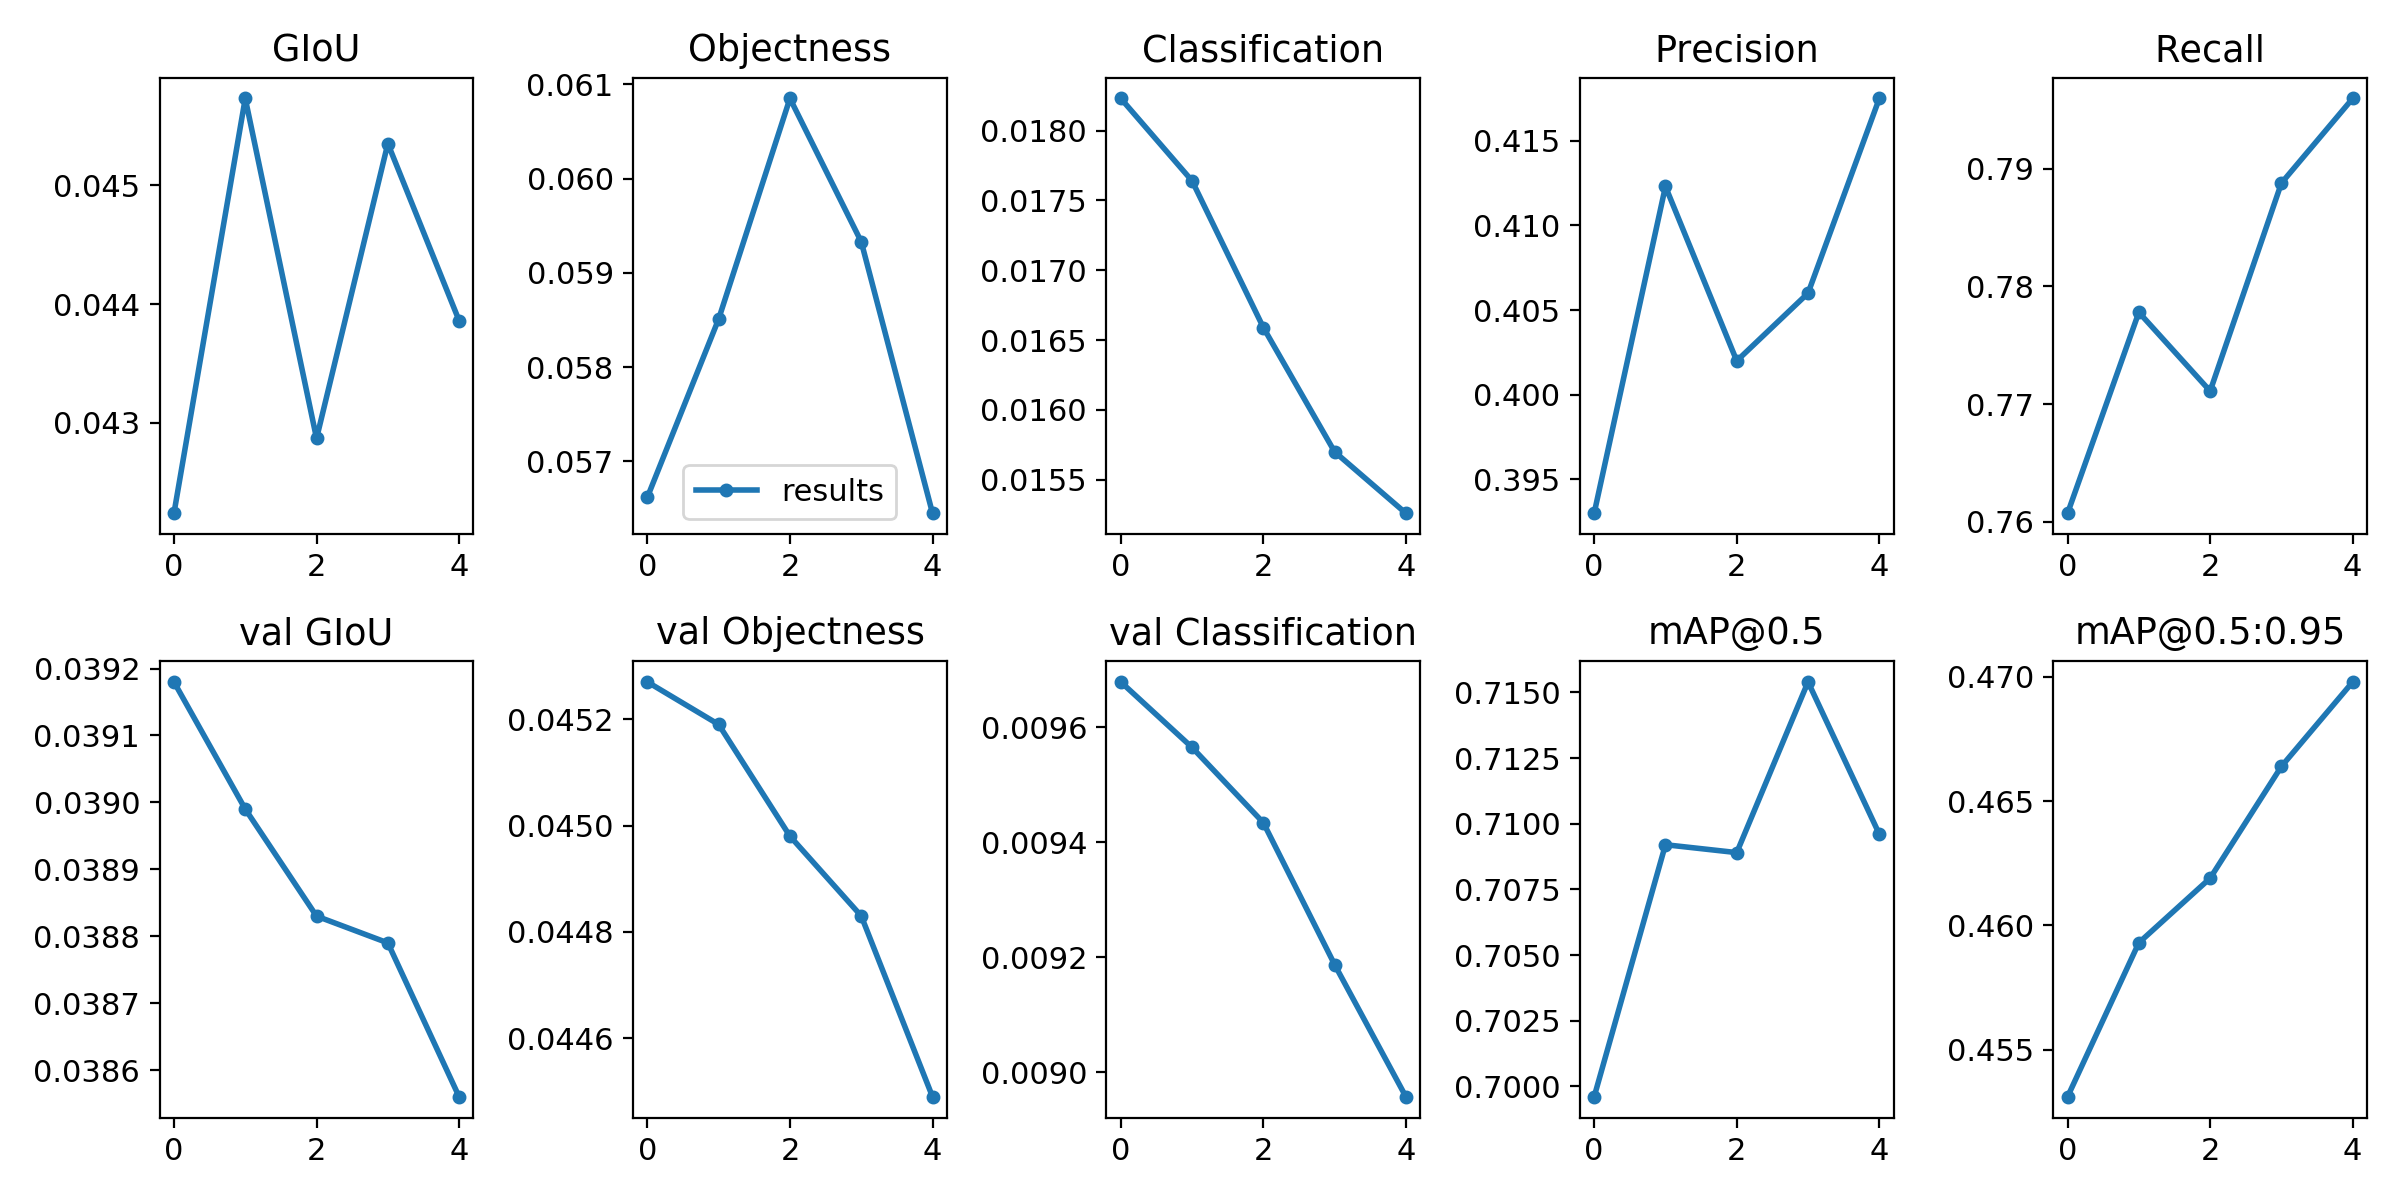

In [15]:
# from utils.utils import plot_results; plot_results()  # plot results.txt as results.png
Image(filename='../yolov5/runs/exp0_tutorial/results.png', width=1000)  # view results.png

In [ ]:
# from utils.general import plot_results; plot_results()  # plot results.txt as results.png

## 5. Appendix

In [ ]:
# Re-clone
%cd ..
!rm -rf yolov5 && git clone https://github.com/ultralytics/yolov5
%cd yolov5

In [ ]:
# Apex install
git clone https://github.com/NVIDIA/apex && cd apex && pip install -v --no-cache-dir --global-option="--cpp_ext" --global-option="--cuda_ext" . --user && cd .. && rm -rf apex

In [ ]:
# Test GCP checkpoint on COCO val2017
%%shell
x=best*.pt
gsutil cp gs://*/*/weights/$x .
python test.py --weights $x --data ./data/coco.yaml --img 736

In [ ]:
# Test multiple models on COCO val2017
%%shell
for x in yolov5s yolov5m yolov5l yolov5x
do 
  python test.py --weights $x.pt --data ./data/coco.yaml --img 640 --conf 0.001
done

### 2.1 val2017
Download COCO val 2017 dataset, 1GB, 5000 images, and test model accuracy.

In [ ]:
# Download COCO val2017
gdrive_download('1Y6Kou6kEB0ZEMCCpJSKStCor4KAReE43','coco2017val.zip')  # val2017 dataset
!mv ./coco ../  # move folder alongside /yolov5

In [ ]:
# Run YOLOv5s on COCO val2017
!python test.py --weights yolov5s.pt --data ./data/coco.yaml --img 640

In [ ]:
# Run YOLOv5x on COCO val2017
!python test.py --weights yolov5x.pt --data ./data/coco.yaml --img 640

###2.2 test-dev2017
Download COCO test2017 dataset, 7GB, 40,000 images, to test model accuracy on test-dev set, 20,000 images. Results are saved to a `*.json` file which can be submitted to the evaluation server at https://competitions.codalab.org/competitions/20794.

In [ ]:
# Download COCO test-dev2017
gdrive_download('1cXZR_ckHki6nddOmcysCuuJFM--T-Q6L','coco2017labels.zip')  # annotations
!f="test2017.zip" && curl http://images.cocodataset.org/zips/$f -o $f && unzip -q $f && rm $f  # 7GB,  41k images
!mv ./test2017 ./coco/images && mv ./coco ../  # move images into /coco and move /coco alongside /yolov5

In [ ]:
# Run YOLOv5s on COCO test-dev2017 with argument --task test
!python test.py --weights yolov5s.pt --data ./data/coco.yaml --task test